In [15]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [16]:
### LOAD THE EXPERIMENT
experiment = "2by2_100cycles_control"


#----
path_exp = f"data/{experiment}"
pack = None
with open(path_exp+".pkl", 'rb') as f:
    pack = pickle.load(f)

print(f"Detailing epxeriment: {experiment}")
print(f"{pack.series}s-{pack.parallel}p Configuration") 
print(f"{pack.cycles} Cycles, CC-discharge, CC-charge, CV-charge protocol") 
print(f"Applied current (CC phases): {pack.iappt}")
print(f"Voltage cutoffs: {pack.cutoffs}")
print(f"Min current cutoff (CV-phase): {pack.min_current}")

data = pd.read_csv(path_exp+".csv", index_col=[0,1,2])
CYCLE = data.index.get_level_values(0)
PROTOCOL = data.index.get_level_values(1)

Detailing epxeriment: 2by2_100cycles_control
2s-2p Configuration
100 Cycles, CC-discharge, CC-charge, CV-charge protocol
Applied current (CC phases): 27.263836618115
Voltage cutoffs: (2.0, 4.1)
Min current cutoff (CV-phase): 2.7263836618115


In [17]:
toplot = [1] + list(range(10, 110, 10))
group = data.loc[
    (CYCLE.isin(toplot)) & 
    (PROTOCOL.str.contains("-discharge"))
]

# c = pack.cells[0,0]
# print(c.pos.eps_n.value)
group


Global Time         Time  Pack Voltage  String 1 Iapp  \
1   CC-discharge 0   0.000000e+00     0.000000      7.871409     -13.631918   
                 1   7.272727e+01    72.727273      7.845185     -13.631918   
                 2   1.454545e+02   145.454545      7.826812     -13.631918   
                 3   2.181818e+02   218.181818      7.809325     -13.631918   
                 4   2.909091e+02   290.909091      7.792547     -13.631918   
...                           ...          ...           ...            ...   
100 CC-discharge 78  1.424804e+06  5672.727273      6.403676     -13.631918   
                 79  1.424876e+06  5745.454545      6.304572     -13.631918   
                 80  1.424949e+06  5818.181818      6.137083     -13.631918   
                 81  1.425022e+06  5890.909091      5.671623     -13.631918   
                 82  1.425077e+06  5946.291835      4.000010     -13.631918   

                     String 2 Iapp  Cell 1,1 Cathode vConcentration  \
1   CC-discharge 0      -13.631918                     25777.500000   
                 1      -13.631918                     26055.713458   
                 2      -13.631918                     26265.512360   
                 3      -13.631918                     26474.378853   
                 4      -13.631918                     26683.227833   
...                            ...                              ...   
100 CC-discharge 78     -13.631918                     44826.896199   
                 79     -13.631918                     45035.743743   
                 80     -13.631918                     45244.591287   
                 81     -13.631918                     45453.438831   
                 82     -13.631918                     45612.478895   

                     Cell 1,1 Anode vConcentration  \
1   CC-discharge 0                    22610.700000   
                 1                    22345.806057   
                 2                    22119.064898   
                 3                    21892.337098   
                 4                    21665.609401   
...                                            ...   
100 CC-discharge 78                    1074.725648   
                 79                     847.997952   
                 80                     621.270256   
                 81                     394.542561   
                 82                     221.886534   

                     Cell 1,1 Anode vSEI Length  Cell 1,1 Voltage  \
1   CC-discharge 0                 5.000000e-09          3.935704   
                 1                 5.000000e-09          3.922592   
                 2                 5.000000e-09          3.913406   
                 3                 5.000000e-09          3.904663   
                 4                 5.000000e-09          3.896273   
...                                         ...               ...   
100 CC-discharge 78                9.250365e-09          3.201838   
                 79                9.250365e-09          3.152286   
                 80                9.250365e-09          3.068541   
                 81                9.250365e-09          2.835811   
                 82                9.250365e-09          2.000005   

                     Cell 1,1 Capacity by Area  ...  \
1   CC-discharge 0                    0.000000  ...   
                 1                    0.275392  ...   
                 2                    0.550785  ...   
                 3                    0.826177  ...   
                 4                    1.101569  ...   
...                                        ...  ...   
100 CC-discharge 78                  21.480599  ...   
                 79                  21.755991  ...   
                 80                  22.031383  ...   
                 81                  22.306775  ...   
                 82                  22.516490  ...   

                     Cell 2,1 Cathode vConcentration  \
1   CC-discharge 0       

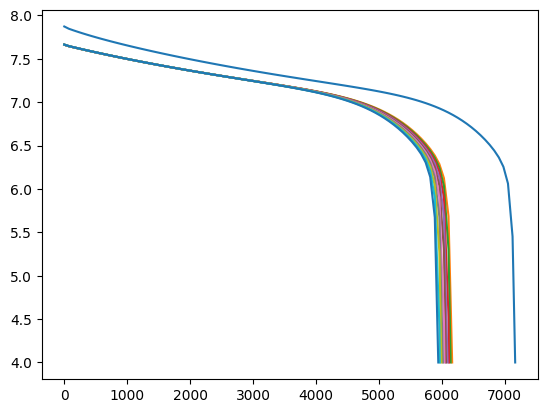

In [19]:
for cycle in toplot:
    plt.plot(group.loc[(cycle), 'Time'], group.loc[(cycle), 'Pack Voltage'])